<a href="https://colab.research.google.com/github/hamedshaik71/ML-Projects-/blob/main/Building_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np

Building The Linear Regression Model

In [159]:
class LinearRegression:
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    self.m,self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    dw = -(2 / self.m) * (self.X.T.dot(self.Y - Y_prediction))
    db = -(2 / self.m) * np.sum(self.Y - Y_prediction)

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  def predict(self,X):
    return X.dot(self.w)+self.b

Implementing Linear Regression

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [161]:
salary_data = pd.read_csv('/content/Salary.csv')

In [162]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [163]:
salary_data.shape

(35, 2)

In [164]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [165]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [166]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [167]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [169]:
print(X.shape,X_test.shape,X_train.shape)

(35, 1) (12, 1) (23, 1)


In [170]:
model = LinearRegression(learning_rate=0.01,no_of_iterations=1000)

In [171]:
model.fit(X_train,Y_train)

In [172]:
print('Weight=',model.w[0])

Weight= 8709.332290890097


In [173]:
print('Bias:',model.b)

Bias: 29428.73703567218


In [174]:
print("Weight shape:", model.w.shape)  # should be (1,)
print("X_test shape:", X_test.shape)   # should be (n_samples, 1)

Weight shape: (1,)
X_test shape: (12, 1)


In [175]:
test_data_pred = model.predict(X_test)

In [176]:
print(test_data_pred)

[ 65136.99942832  68620.73234468 112167.39379913  61653.26651197
 119134.85963184 136553.52421362  39009.00255565  81684.73078101
  64266.06619923  40750.86901383  73846.33171921 126973.25869364]


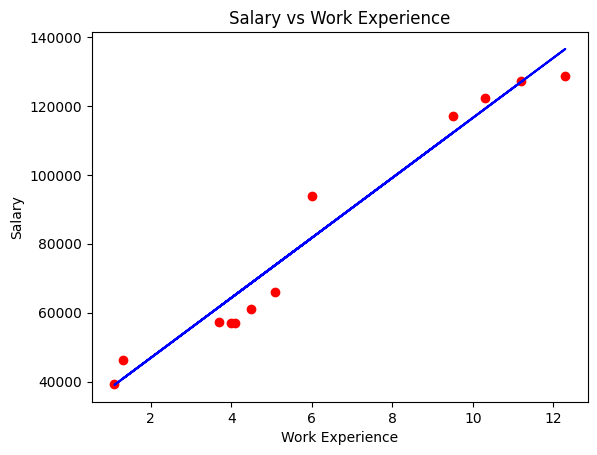

In [177]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_pred,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()